In [110]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import pymongo 
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
df_hours = pd.read_csv("../data/Book1.csv")

In [3]:
df_final = pd.read_csv("../data/FINAL.csv")
df_final

,title,developer,publisher,multiplayer_or_singleplayer,price,dc_price,ReleaseDate,PriceInitial,rating,genre
0,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,NaN,NaN,NaN,NaN
1,Dota 2,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Free to play,NaN,NaN,NaN,NaN
2,"Warhammer 40,000: Darktide",NaN,NaN,NaN,"2,199","2,199",NaN,NaN,NaN,NaN
3,Call of Duty®: Modern Warfare® II,NaN,NaN,NaN,"4,999","4,999",NaN,NaN,NaN,NaN
4,Apex Legends,NaN,NaN,NaN,Free to play,Free to play,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
96014,God of War,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Drama"
96015,God of War III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Drama"
96016,Mass Effect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Horror"
96017,Mass Effect 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,Action


In [4]:
df_final.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
96014     True
96015     True
96016     True
96017     True
96018     True
Length: 96019, dtype: bool

In [5]:
df_LAST = df_final.drop_duplicates()

In [6]:
df_LAST

,title,developer,publisher,multiplayer_or_singleplayer,price,dc_price,ReleaseDate,PriceInitial,rating,genre
0,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Free to play,NaN,NaN,NaN,NaN
1,Dota 2,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Free to play,NaN,NaN,NaN,NaN
2,"Warhammer 40,000: Darktide",NaN,NaN,NaN,"2,199","2,199",NaN,NaN,NaN,NaN
3,Call of Duty®: Modern Warfare® II,NaN,NaN,NaN,"4,999","4,999",NaN,NaN,NaN,NaN
4,Apex Legends,NaN,NaN,NaN,Free to play,Free to play,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
86014,God of War,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Drama"
86015,God of War III,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Drama"
86016,Mass Effect,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,"Action, Adventure, Horror"
86017,Mass Effect 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.1,Action


In [7]:
df_LAST["developer"] = df_LAST["developer"].fillna("Valve")

In [8]:
df_LAST["publisher"] = df_LAST["publisher"].fillna("Valve")
df_LAST["multiplayer_or_singleplayer"] = df_LAST["multiplayer_or_singleplayer"].fillna("Multi-player")
df_LAST["price"] = df_LAST["price"].fillna("Free to play")


In [9]:
df_LAST.drop(["dc_price"],axis = 1,inplace=True)

In [10]:
df_LAST.drop(["PriceInitial"],axis = 1,inplace=True)

In [11]:
df_LAST["ReleaseDate"] = df_LAST["ReleaseDate"].fillna("Nov 1 2000")

In [12]:
df_LAST

,title,developer,publisher,multiplayer_or_singleplayer,price,ReleaseDate,rating,genre
0,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Nov 1 2000,NaN,NaN
1,Dota 2,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Nov 1 2000,NaN,NaN
2,"Warhammer 40,000: Darktide",Valve,Valve,Multi-player,"2,199",Nov 1 2000,NaN,NaN
3,Call of Duty®: Modern Warfare® II,Valve,Valve,Multi-player,"4,999",Nov 1 2000,NaN,NaN
4,Apex Legends,Valve,Valve,Multi-player,Free to play,Nov 1 2000,NaN,NaN
...,...,...,...,...,...,...,...,...
86014,God of War,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Drama"
86015,God of War III,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Drama"
86016,Mass Effect,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Horror"
86017,Mass Effect 3,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,Action


In [13]:
df_LAST["rating"].mean()

9.202

In [14]:
df_LAST["rating"] = df_LAST["rating"].fillna("9.2")

In [15]:
df_LAST["genre"] = df_LAST["genre"].fillna("Action")

In [16]:
df_LAST

,title,developer,publisher,multiplayer_or_singleplayer,price,ReleaseDate,rating,genre
0,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Nov 1 2000,9.2,Action
1,Dota 2,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Nov 1 2000,9.2,Action
2,"Warhammer 40,000: Darktide",Valve,Valve,Multi-player,"2,199",Nov 1 2000,9.2,Action
3,Call of Duty®: Modern Warfare® II,Valve,Valve,Multi-player,"4,999",Nov 1 2000,9.2,Action
4,Apex Legends,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.2,Action
...,...,...,...,...,...,...,...,...
86014,God of War,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Drama"
86015,God of War III,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Drama"
86016,Mass Effect,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Horror"
86017,Mass Effect 3,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,Action


In [17]:
df_LAST['rating'] = pd.to_numeric(df_LAST['rating'],errors = 'coerce')

In [40]:
df_LAST['price'] = pd.to_numeric(df_LAST['price'],errors = 'coerce')

In [18]:
df_LAST.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72675 entries, 0 to 86018
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        65377 non-null  object 
 1   developer                    72675 non-null  object 
 2   publisher                    72675 non-null  object 
 3   multiplayer_or_singleplayer  72675 non-null  object 
 4   price                        72675 non-null  object 
 5   ReleaseDate                  72675 non-null  object 
 6   rating                       72675 non-null  float64
 7   genre                        72675 non-null  object 
dtypes: float64(1), object(7)
memory usage: 5.0+ MB


In [19]:
df_LAST.to_csv('LAST.csv', header=True, index=False)

# TOP 10 JUEGOS MEJOR VALORADOS

In [20]:
TOP10RATED = df_LAST.sort_values(by='rating',ascending=False).head(10)
TOP10RATED

,title,developer,publisher,multiplayer_or_singleplayer,price,ReleaseDate,rating,genre
85974,My Singing Monsters: Dawn of Fire,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Music, Musical"
85973,Bad Ben,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Comedy, Horror"
85972,Kingdom Hearts HD 1.5 + 2.5 Remix,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Action, Adventure, Family"
85971,Dofus,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,Adventure
85970,The Legend of Zelda: Ocarina of Time 3D,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Action, Adventure, Family"
85969,Kingdom Hearts HD 2.5 Remix,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Action, Adventure, Family"
85975,Touhou 4 Gensoukyou: Lotus Land Story,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Animation, Action, Fantasy"
50037,Legend of Assassin: Egypt,Nord GS,Nord GS,Single-player;Steam Achievements,85,Nov 1 2000,9.2,Action
50041,Little Adventurer III,hubiao,hubiao,Single-player,38,Nov 1 2000,9.2,Action
50040,Steel Fight,Valve,Valve,Multi-player,42,Nov 1 2000,9.2,Action


Text(0.5, 1.0, 'Top 10 Games By Rating')

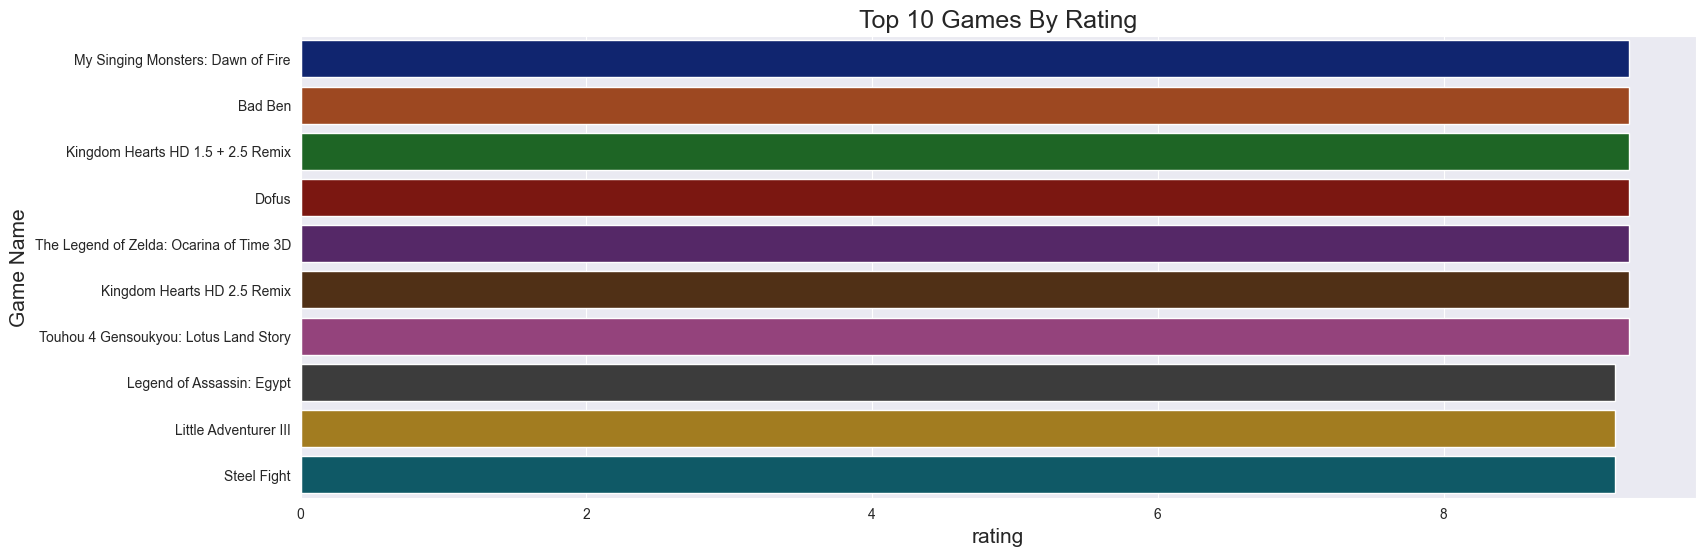

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,6))
sns.barplot(x='rating',y='title',data=TOP10RATED,palette='dark')
plt.ylabel('Game Name',fontsize=15)
plt.xlabel('rating',fontsize=15)
plt.title('Top 10 Games By Rating',fontsize=18)

In [45]:
df_hours

,ID,\nName,Peak No. of Players,Hours Played
0,1,Counter-Strike: Global Offensive,"944,895","411,196,700"
1,2,Lost Ark,"580,042","279,812,296"
2,3,Dota 2,"719,422","326,014,122"
3,4,PUBG: BATTLEGROUNDS,"524,023","159,781,183"
4,5,Apex Legends,"370,651","137,813,200"
...,...,...,...,...
195,196,Dota Underlords,"3,533","1,741,394"
196,197,Tap Ninja,"2,988","1,405,540"
197,198,SAO Utils: Beta,"2,964","1,203,357"
198,199,Call of Duty: Black Ops III,"14,668","4,909,943"


In [46]:
#TOP JUEGOS POR  NÚMERO DE JUGADORES 
Max10Play = df_hours.sort_values(by='Peak No. of Players ',ascending=False).head(10)


In [47]:
Max10Play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 116
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10 non-null     int64 
 1   
Name                 10 non-null     object
 2   Peak No. of Players   10 non-null     object
 3   Hours Played          10 non-null     object
dtypes: int64(1), object(3)
memory usage: 400.0+ bytes


Text(0.5, 1.0, 'Top 10 Games By Hours Played')

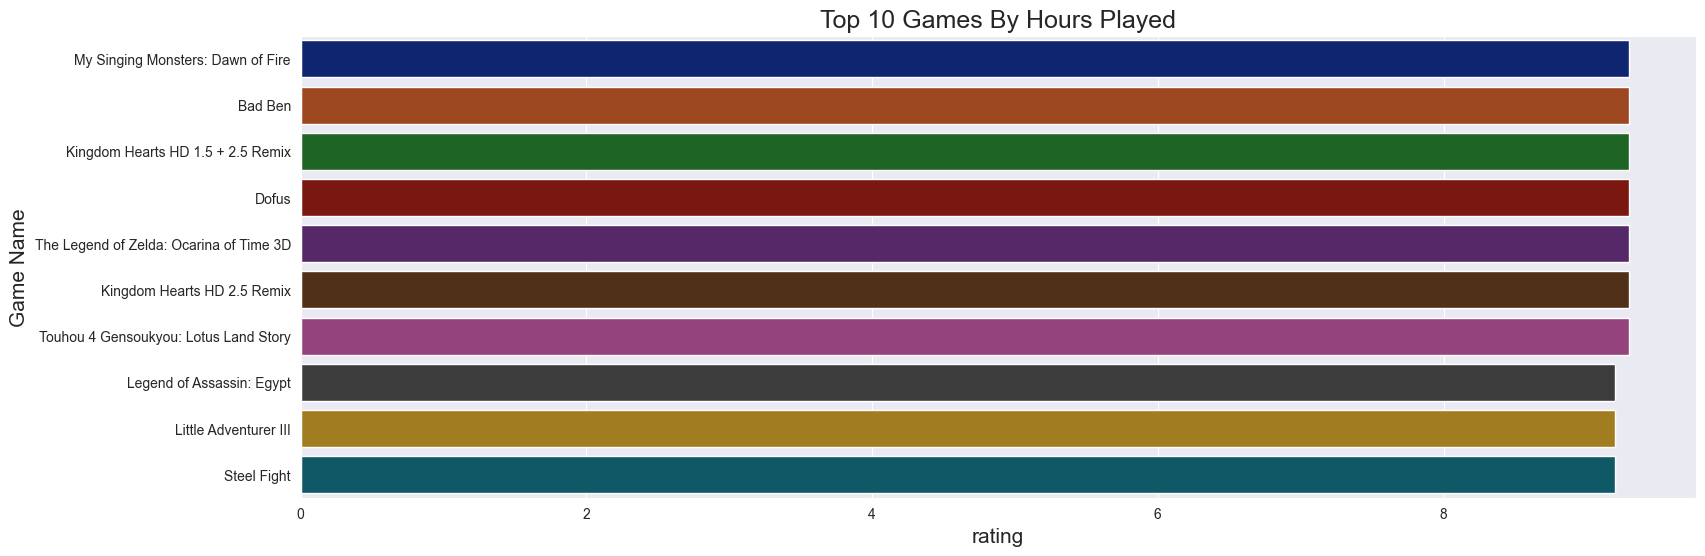

In [48]:
sns.set_style("darkgrid")
plt.figure(figsize=(18,6))
sns.barplot(x='rating',y='title',data=TOP10RATED,palette='dark')
plt.ylabel('Game Name',fontsize=15)
plt.xlabel('rating',fontsize=15)
plt.title('Top 10 Games By Hours Played',fontsize=18)

In [50]:
Max10Play.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 116
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    10 non-null     int64 
 1   
Name                 10 non-null     object
 2   Peak No. of Players   10 non-null     object
 3   Hours Played          10 non-null     object
dtypes: int64(1), object(3)
memory usage: 400.0+ bytes


In [51]:
Max10Play['Hours Played'] = pd.to_numeric(Max10Play['Hours Played'],errors = 'coerce')

In [70]:
cliente = pymongo.MongoClient()

In [71]:
cliente

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [74]:
cliente.list_database_names()

['MONGOLAB', 'PROJECTO', 'STEAM', 'admin', 'config', 'local']

In [75]:
mydb = cliente["PROJECTO"]

In [76]:
coleccion = mydb.detalles

Nos conectamos a la BBDD para hacer algunas visualizaciones.

In [86]:
coleccion.distinct("publisher")[:9]

[' ',
 '  Milestone S.r.l.',
 ' AYE Technology',
 ' Anea_Duo_Dev',
 ' Asterion Games',
 ' Aurora software',
 ' BBB Games',
 ' Big Fish Games',
 ' Black Poodle Entertainment']

EN EL SCRAPEO,NO HEMOS PODIDO SACAR TODA LA PAGINA,SOLO HEMOS SACADO LOS PRIMEROS 10.000 ,Y ENTRE ESTOS,LA MENOR NOTA QUE EXISTE ES UN 9.

# Juegos con una mayor nota que 9.2

In [84]:
Sobresaliente = pd.DataFrame(coleccion.find({'rating': {"$gt": 9.2}}))
Sobresaliente

#Observamos que los juegos con mayor nota pertenecen a los desarrolladores de la misma plataforma.

,_id,title,developer,publisher,multiplayer_or_singleplayer,price,ReleaseDate,rating,genre
0,63ce67a27ff62ae0cf4ed0f5,Kingdom Hearts HD 2.5 Remix,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Action, Adventure, Family"
1,63ce67a27ff62ae0cf4ed0f6,The Legend of Zelda: Ocarina of Time 3D,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Action, Adventure, Family"
2,63ce67a27ff62ae0cf4ed0f7,Dofus,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,Adventure
3,63ce67a27ff62ae0cf4ed0f8,Kingdom Hearts HD 1.5 + 2.5 Remix,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Action, Adventure, Family"
4,63ce67a27ff62ae0cf4ed0f9,Bad Ben,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Comedy, Horror"
5,63ce67a27ff62ae0cf4ed0fa,My Singing Monsters: Dawn of Fire,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Music, Musical"
6,63ce67a27ff62ae0cf4ed0fb,Touhou 4 Gensoukyou: Lotus Land Story,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.3,"Animation, Action, Fantasy"


Mejores juegos rateados, segun su género.

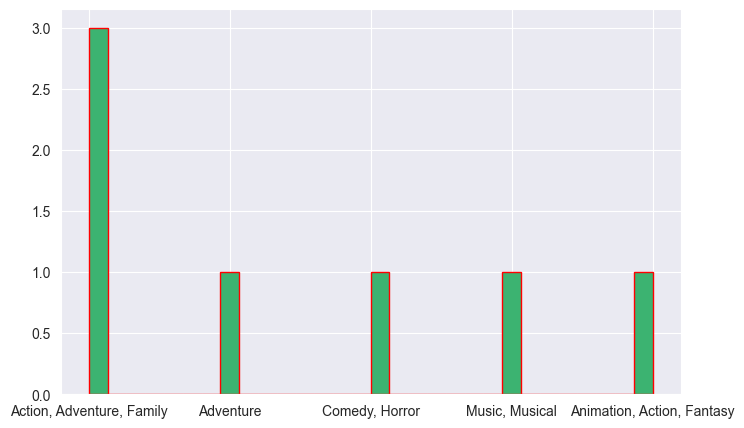

In [96]:
plt.figure(figsize = (8,5))

plt.hist(Sobresaliente["genre"], edgecolor = "red",
                        facecolor = "mediumseagreen",
                        bins = 30)
plt.show();

# Juegos con una menor nota que 9.2

In [90]:
No_sobresaliente = pd.DataFrame(coleccion.find({'rating': {"$lte": 9.1}}))
No_sobresaliente

,_id,title,developer,publisher,multiplayer_or_singleplayer,price,ReleaseDate,rating,genre
0,63ce67a27ff62ae0cf4ed121,Horizon: Forbidden West,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Fantasy"
1,63ce67a27ff62ae0cf4ed122,God of War,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Drama"
2,63ce67a27ff62ae0cf4ed123,God of War III,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Drama"
3,63ce67a27ff62ae0cf4ed124,Mass Effect,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Horror"
4,63ce67a27ff62ae0cf4ed125,Mass Effect 3,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,Action
5,63ce67a27ff62ae0cf4ed126,BioShock,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,Action


Observamos la gráfica con los juegos mejores rateados, según al género que pertenecen

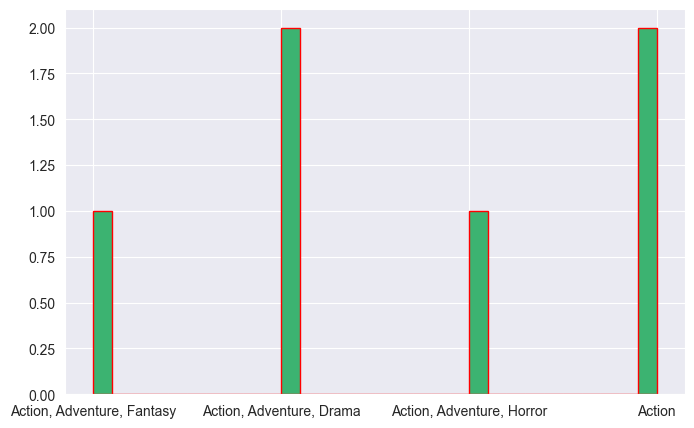

In [97]:
plt.figure(figsize = (8,5))

plt.hist(No_sobresaliente["genre"], edgecolor = "red",
                        facecolor = "mediumseagreen",
                        bins = 30)
plt.show();

Buscaremos ahora los títulos que no pertenecen a los desarrolladores de la propia aplicación.

In [104]:
externos = pd.DataFrame(coleccion.find({"publisher": {"$nin": ["Valve"]}}))
externos

,_id,title,developer,publisher,multiplayer_or_singleplayer,price,ReleaseDate,rating,genre
0,63ce67a27ff62ae0cf4db54b,Dead by Daylight,Behaviour Digital Inc.,Behaviour Digital Inc.,Multi-player;Online Multi-Player;Co-op;Online ...,749,Nov 1 2000,9.2,Action
1,63ce67a27ff62ae0cf4db54c,Warframe,Digital Extremes,Digital Extremes,Single-player;Multi-player;Co-op;Steam Trading...,Free to play,Nov 1 2000,9.2,Action
2,63ce67a27ff62ae0cf4db54d,War Thunder,Gaijin Entertainment,Gaijin Entertainment,Single-player;MMO;Co-op;Cross-Platform Multipl...,Free to play,Nov 1 2000,9.2,Action
3,63ce67a27ff62ae0cf4db54f,Grand Theft Auto V,Rockstar North,Rockstar Games,Single-player;Multi-player;Steam Achievements;...,Free to play,Nov 1 2000,9.2,Action
4,63ce67a27ff62ae0cf4db552,The Elder Scrolls® Online,Zenimax Online Studios,Bethesda Softworks,MMO;Steam Trading Cards;Partial Controller Sup...,"1,599",Nov 1 2000,9.2,Action
...,...,...,...,...,...,...,...,...,...
22058,63ce67a27ff62ae0cf4eb132,BOTOLO,Ian Snyder,Ian Snyder,Single-player;Local Multi-Player;Shared/Split ...,479,Nov 1 2000,9.2,Action
22059,63ce67a27ff62ae0cf4eb240,HIVE,BlueLine Games,BlueLine Games,Single-player;Multi-player;Cross-Platform Mult...,199,Nov 1 2000,9.2,Action
22060,63ce67a27ff62ae0cf4eb265,Lost,RewindApp,RewindApp,Single-player,379,Nov 1 2000,9.2,Action
22061,63ce67a27ff62ae0cf4eb35a,Malkia,Sports interactive,SEGA,Single-player,"1,012",Nov 1 2000,9.2,Action


Miraremos ahora todos los juegos que son SINGLE-PLAYER.

In [134]:
multiplayer_games = pd.DataFrame(coleccion.find({"multiplayer_or_singleplayer": {"$ne": ["Multi-player"]}}))
multiplayer_games

,_id,title,developer,publisher,multiplayer_or_singleplayer,price,ReleaseDate,rating,genre
0,63ce67a27ff62ae0cf4db544,Counter-Strike: Global Offensive,Valve;Hidden Path Entertainment,Valve,Multi-player;Steam Achievements;Full controlle...,Free to play,Nov 1 2000,9.2,Action
1,63ce67a27ff62ae0cf4db545,Dota 2,Valve,Valve,Multi-player;Co-op;Steam Trading Cards;Steam W...,Free to play,Nov 1 2000,9.2,Action
2,63ce67a27ff62ae0cf4db546,"Warhammer 40,000: Darktide",Valve,Valve,Multi-player,"2,199",Nov 1 2000,9.2,Action
3,63ce67a27ff62ae0cf4db547,Call of Duty®: Modern Warfare® II,Valve,Valve,Multi-player,"4,999",Nov 1 2000,9.2,Action
4,63ce67a27ff62ae0cf4db548,Apex Legends,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.2,Action
...,...,...,...,...,...,...,...,...,...
72670,63ce67a27ff62ae0cf4ed122,God of War,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Drama"
72671,63ce67a27ff62ae0cf4ed123,God of War III,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Drama"
72672,63ce67a27ff62ae0cf4ed124,Mass Effect,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,"Action, Adventure, Horror"
72673,63ce67a27ff62ae0cf4ed125,Mass Effect 3,Valve,Valve,Multi-player,Free to play,Nov 1 2000,9.1,Action


In [ ]:
plt.figure(figsize = (8,5))

plt.hist(multiplayer_games["publisher"], edgecolor = "red",
                        facecolor = "mediumseagreen",
                        bins = 30)
plt.show();